#  Tööleht 3- andmetüübid ning nende visualiseerimine


Eelmise töölehe viimasest ülesandest nägime, et andmete visualiseerimine võib olla päris keeruline ja erineb vägagi andmetüübist. 

Et paremini mõista, kuidas andmeid visualiseerida, räägime kõigepealt erinevatest andmetüüpidest ja toome mõned konkreetsed näited.

Kasutame definitsioonides ingliskeelseid termineid.
Me võime jagada andmetüüpe nelja kategooriasse:




| Andmetüüp |       Lubatud tehted       | Näide                            |
|-----------|:------------------:|----------------------------------|
| Nominal   | =, !=              | Nimed, sugu, id-kood, juuksevärv |
| Ordinal   | =, !=, <, >        | Hinded, jäätise maitsed, lennu number          |
| Interval  | =, !=, <, >, +, -  | Kuupäevad, temperatuur (Celsius) |
| Ratio     | =,!=, <,>,+,-,*,\  | Raha, vanus, pikkus              |

Märkus: nominal ja ordinal andmeid nimetatakse **kategoorilisteks** andmeteks ja interval ja ratio andmeid **numbrilisteks** andmeteks.

Kui neid tehteid googeldada, leiab selle kohta rohkelt informatsiooni. Üks youtube'i video seletab ka neid mõisteid: https://www.youtube.com/watch?v=hZxnzfnt5v8 


In [8]:
# Ülesanne: ava abalone dataset paketiga pandas (see, millega eelmine nädal töötasime) ning kirjuta alla, mis andmetüübid seal on. 
import pandas
z = pandas.read_csv("/Users/gustavtamkivi/Documents/Code/someschoolting/3.ylesanne/abalone - abalone.csv")
print(z.dtypes)
z

Gender       object
Length      float64
Diameter    float64
Height      float64
Weight      float64
Rings         int64
dtype: object


,Gender,Length,Diameter,Height,Weight,Rings
0,F,0.505,0.385,0.135,0.6185,12
1,F,0.650,0.475,0.165,1.3875,9
2,I,0.520,0.380,0.135,0.5395,8
3,F,0.550,0.425,0.140,0.9520,7
4,M,0.640,0.525,0.180,1.3135,10
...,...,...,...,...,...,...
995,I,0.550,0.415,0.135,0.8095,12
996,I,0.455,0.435,0.110,0.4265,8
997,M,0.660,0.500,0.165,1.3195,9
998,I,0.525,0.400,0.130,0.6455,8


*Vastus* 

- Gender: Nominal / object
- Length: Ratio / float64
- Diameter: Ratio / float64
- Height: Ratio / float64
- Weight: Ratio / float64
- Rings: Ratio / int64

Erinevate andmetüüpide visualiseerimisel on kasuks erinevad graafikute tüübid. Et valida õige graafik on vaja sul läbida järgmised saamud:

1. Sõnasta uurimisküsimus (nt: "Kuidas sõltub temperatuur aastaajast?"
2. Vali andmed (nt: Temperatuurid kuude lõikes)
3. Vaata, mis andmed käivad x-teljelel ning mis y-teljele (mis sõltub millest? Kas kuud sõltuvad temperatuurist või temperatuur sõltub kuust?(x-teljel on kuude nimed ja y-teljel on temperatuur)
4. Mis tüüpi andmetega on tegemist? (Temperatuur on interval ja kuupäev on ordinal)
5. Vali andmetüübile vastav graafik (Nt antud juhul sobib tulpdiagramm)


Allpool on toodud näited erinevatest andmetüüpidest ning mis graafikud sobivad. ***Siin koode muutma ei pea***


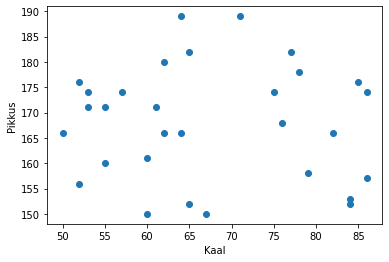

In [1]:
# Näide 1 -  nii x ja y teljel on interval või ratio andmed. 
#Nt Kaal vs Kehapikkus või Teenitav palk vs kui palju kulutatakse raha väljas söömisele

#Siis kasutatakse tavaliselt scatter-ploti (võib ka tavalist joongraafikut). 

import random
import matplotlib.pyplot as plt
#Hetkel genereerin suvalised andmed
X = [random.randrange(50, 90, 1) for i in range(30)]
Y = [random.randrange(150, 190, 1) for i in range(30)]

#Loon graafiku
plt.scatter(X,Y)
plt.xlabel("Kaal")
plt.ylabel("Pikkus")
plt.show()

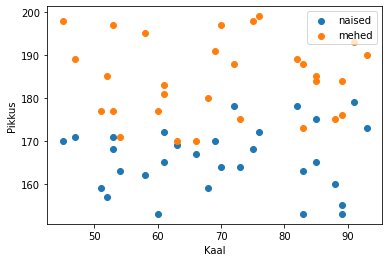

In [3]:
#Märkus:  Vahepeal saame vaadata ka kolme andme suhet - 
#nt vaadata kahe numbrilise väärtuse sõltuvust naistel ja meestel 
#Selleks saame eristada väärtuseid värviga:
X = [random.randrange(45, 95, 1) for i in range(30)]
Y_naised = [random.randrange(150, 180, 1) for i in range(30)]
Y_mehed =  [random.randrange(170, 200, 1) for i in range(30)]
#Loon graafiku
plt.scatter(X,Y_naised,label = "naised")
plt.scatter(X,Y_mehed,label = "mehed")

plt.xlabel("Kaal")
plt.ylabel("Pikkus")
plt.legend(loc = "best")
plt.show()


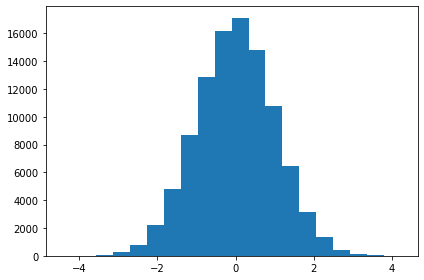

In [4]:
#Näide 2 - üks numbriline väärtus ja tahame analüüsida nende esinemist (nt kuidas jaotub inimeste IQ või pikkus)

#Saame kasutada histogrammi: 
import numpy as np

N_points = 100000
n_bins = 20

x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(x, bins=n_bins)
plt.show()

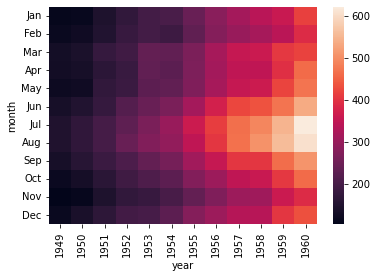

In [5]:
# Näide 3 - kaks ordinal/nominal väärtust (nt vaadata iga klassi lõikes kuidas õpilased jaguvad suundadesse)

#Selle jaoks kasutatakse nt heat-mapi 
import seaborn as sns 
#Seaborn on peale matplotlibi üks teine visualiseerimispakett 
#- tihti saab sellega palju ilusamaid graafikuid   

#Siin laeme andmestiku seaborni paketist, flights on üks klassikaline andmestik, graafiku all võid seda tabelina näha
flights = sns.load_dataset("flights")

#Antud näites soovime analüüsida, kuidas aasta ja kuu lõikes on muutunud lendajate arv
flights = flights.pivot("month", "year", "passengers")

ax = sns.heatmap(flights)

In [6]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


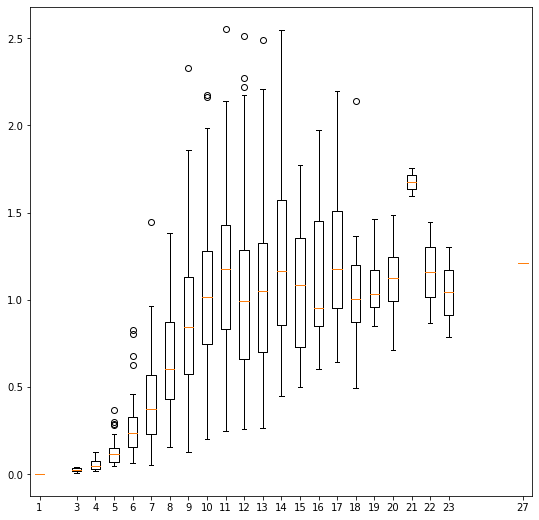

In [7]:
#Kategooriline väärtus vs numbriline väärtus (nt õpilaste eksamitulemused aastate lõikes)

#Seda nägime juba eelmisel töölehel, kus soovisime analüüsida ringide ja kaalude vahelist suhet:
import pandas as pd
andmed = pd.read_csv("abalone.csv")

#Võtan välja anomaaliad
andmed = andmed[andmed["Rings"]<=200]

#Leian kõik ringide võimalikud väärtused
ringid = andmed["Rings"].unique()

#sorteerin väärtuste listi
ringid.sort()

#Y-telje jaoks loon listi
data_to_plot = []
for r in ringid:
    kaal = andmed[andmed["Rings"]==r]["Weight"]
    data_to_plot.append(kaal)
    
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
axes.boxplot(data_to_plot,positions = ringid)
plt.show()


# NB
Kindlasti ei ole need reeglid kivisse raiutud vaid pigem on tegemist heade tavade/soovitustega, mis annavad suunised,
kus kohast alustada.


Üks hea graafikuvalimise tabel: https://flowingdata.com/2009/01/15/flow-chart-shows-you-what-chart-to-use/

Matplotlibi kodulehekülg: https://matplotlib.org/ (examples ja tutorials leht on suureks abiks)

Seaborn kodulehekülg: https://seaborn.pydata.org/


Järgmisena saabki natuke kätt harjutada erinevate andmetüüpide peal (ja kuidas graafikuid teha)


# Ülesanne 


All on lisatud andmetabel 
*instacart* (https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)
ja *adult* 

Sinu ülesanne on uurida käesolevaid tabeleid ning teha viis graafikut 
(sh üks histogramm, üks boxplot/violinplot, üks scatterplot, üks heatmap, üks omal valikul)

Kui sa näed andmestikus mingeid anomaaliaid, võid need välja valida. Ja nagu ikka - küsimuste korral kirjuta õpetajale :) 


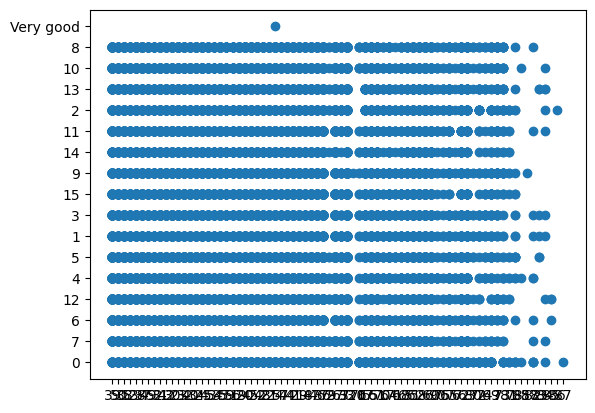

In [19]:
#setup
import pandas as p
import matplotlib.pyplot as mpl
adult = p.read_csv("/Users/gustavtamkivi/Documents/Code/someschoolting/3.ylesanne/adult - adult.csv")
instacart = p.read_csv("/Users/gustavtamkivi/Documents/Code/someschoolting/3.ylesanne/instacart_100k - instacart_100k.csv")


#Graafik 1: Uurime, kas on USAs mingi seos vanuse ja rahulolekuga tookohaga
mpl.scatter(adult.age, adult.jobsatisfaction) 

AttributeError: module 'pandas' has no attribute 'show'

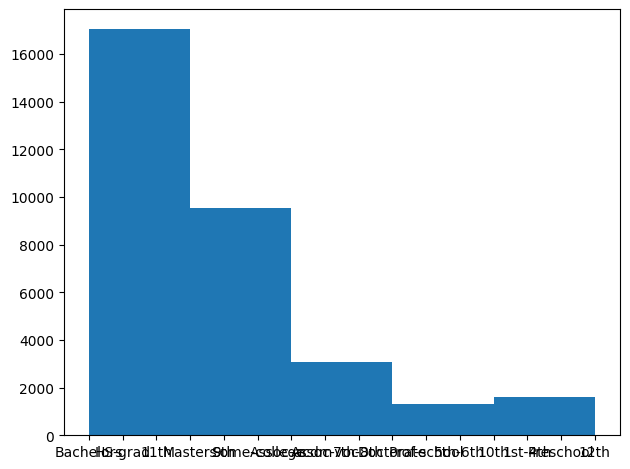

In [28]:
#Graafik 2: Erinevate haridustasemete esinemine USA tooturul
import pandas as p
import matplotlib.pyplot as mpl
adult = p.read_csv("/Users/gustavtamkivi/Documents/Code/someschoolting/3.ylesanne/adult - adult.csv")

fig, axs = mpl.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(adult.education, bins=5)
mpl.show()